In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data= pd.read_csv('iris.txt')
data.columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data.head(4)

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
data['class'] = pd.Categorical(pd.factorize(data['class'])[0]+1)
data.head(4)

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.9,3.0,1.4,0.2,1
1,4.7,3.2,1.3,0.2,1
2,4.6,3.1,1.5,0.2,1
3,5.0,3.6,1.4,0.2,1


In [3]:
data = data.sample(frac=1, random_state=31).reset_index(drop=True)
data.head(4)

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.6,3.6,1.0,0.2,1
1,5.7,2.5,5.0,2.0,3
2,5.8,4.0,1.2,0.2,1
3,6.8,3.2,5.9,2.3,3


In [4]:
data_x = data.iloc[:,[True, True, True, False, True]]
data_y = data.iloc[:,3]
data_x.head(4)

,sepal-length,sepal-width,petal-length,class
0,4.6,3.6,1.0,1
1,5.7,2.5,5.0,3
2,5.8,4.0,1.2,1
3,6.8,3.2,5.9,3


In [5]:
data_y.head(4)

0    0.2
1    2.0
2    0.2
3    2.3
Name: petal-width, dtype: float64

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_x)
data_x = scaler.transform(data_x)
data_x[0:4]

array([[-1.51163569,  1.27069504, -1.58204889, -1.23508045],
       [-0.17960833, -1.27535529,  0.69879566,  1.21861271],
       [-0.05851493,  2.19653152, -1.46800666, -1.23508045],
       [ 1.15241904,  0.34485856,  1.21198569,  1.21861271]])

In [7]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.33, shuffle=False)

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
lr.intercept_

1.195812862484853

In [10]:
lr.coef_

array([-0.08078279,  0.08455582,  0.57069458,  0.26649877])

In [11]:
predicted_y = lr.predict(test_x)
predicted_y[0:5]

array([1.91072235, 0.18653227, 1.38531787, 1.93687429, 1.741591  ])

In [12]:
np.array(test_y[0:5])

array([2. , 0.1, 1.5, 1.8, 1.7])

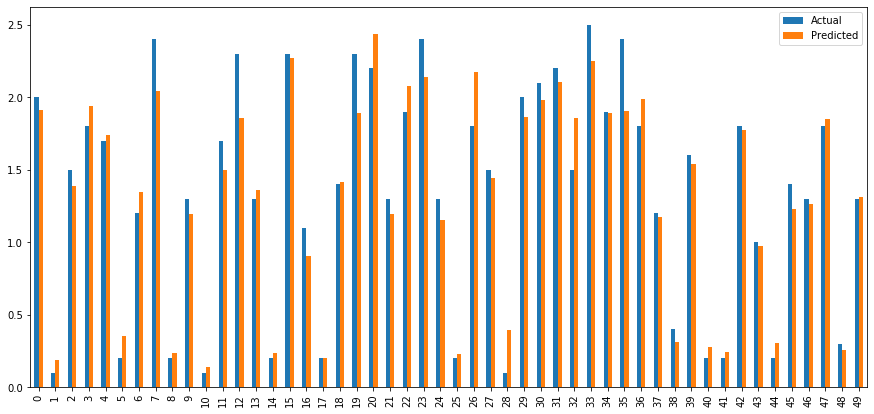

In [13]:
df = pd.DataFrame({'Actual': np.array(test_y), 'Predicted': predicted_y})
df.plot(figsize=(15,7), kind='bar')
plt.show()

In [14]:
from sklearn import metrics
meanAbsError = metrics.mean_absolute_error(np.array(test_y), predicted_y)
meanSqrdError = metrics.mean_squared_error(np.array(test_y), predicted_y)
rootMeanSqrdError = np.sqrt(meanSqrdError)

print(meanAbsError)
print(meanSqrdError)
print(rootMeanSqrdError)

0.13565387614866556
0.033551466181664415
0.18317059311380857


In [15]:
data2= pd.read_csv('iris.txt')
data2.columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data2.head(4)

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
class_label = pd.get_dummies(data2['class'], prefix='class_label')
data2[class_label.columns] = class_label

In [17]:
data2.head(4)

,sepal-length,sepal-width,petal-length,petal-width,class,class_label_Iris-setosa,class_label_Iris-versicolor,class_label_Iris-virginica
0,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
1,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
2,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
3,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0


In [18]:
data2 = data2.drop('class', axis=1)
data2.head(4)

,sepal-length,sepal-width,petal-length,petal-width,class_label_Iris-setosa,class_label_Iris-versicolor,class_label_Iris-virginica
0,4.9,3.0,1.4,0.2,1,0,0
1,4.7,3.2,1.3,0.2,1,0,0
2,4.6,3.1,1.5,0.2,1,0,0
3,5.0,3.6,1.4,0.2,1,0,0


In [33]:
data2 = data2.sample(frac=1, random_state=25).reset_index(drop=True)
data2.head(4)

,sepal-length,sepal-width,petal-length,petal-width,class_label_Iris-setosa,class_label_Iris-versicolor,class_label_Iris-virginica
0,5.1,3.8,1.9,0.4,1,0,0
1,6.1,3.0,4.9,1.8,0,0,1
2,5.8,2.7,5.1,1.9,0,0,1
3,5.5,2.5,4.0,1.3,0,1,0


In [34]:
data_x = data2.iloc[:,[True, True, True, False, True, True, True]]
data_y = data2.iloc[:,3]
data_x.head(4)

,sepal-length,sepal-width,petal-length,class_label_Iris-setosa,class_label_Iris-versicolor,class_label_Iris-virginica
0,5.1,3.8,1.9,1,0,0
1,6.1,3.0,4.9,0,0,1
2,5.8,2.7,5.1,0,0,1
3,5.5,2.5,4.0,0,1,0


In [35]:
data_y.head(4)

0    0.4
1    1.8
2    1.9
3    1.3
Name: petal-width, dtype: float64

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_x)
data_x = scaler.transform(data_x)
data_x[0:4]

array([[-0.90616871,  1.73361328, -1.06885886,  1.42857143, -0.71066905,
        -0.71066905],
       [ 0.30476526, -0.11805969,  0.64177455, -0.7       , -0.71066905,
         1.40712473],
       [-0.05851493, -0.81243705,  0.75581678, -0.7       , -0.71066905,
         1.40712473],
       [-0.42179512, -1.27535529,  0.12858453, -0.7       ,  1.40712473,
        -0.71066905]])

In [84]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.33, shuffle=True)

In [85]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
lr.intercept_

1.1949323150508109

In [87]:
lr.coef_

array([-0.02230664,  0.09555023,  0.2533513 , -0.34654731,  0.05800373,
        0.28678889])

In [88]:
predicted_y = lr.predict(test_x)
predicted_y[0:5]

array([0.12519752, 0.28999376, 2.11414458, 0.17080387, 0.21554229])

In [89]:
np.array(test_y[0:5])

array([0.2, 0.4, 2.3, 0.2, 0.4])

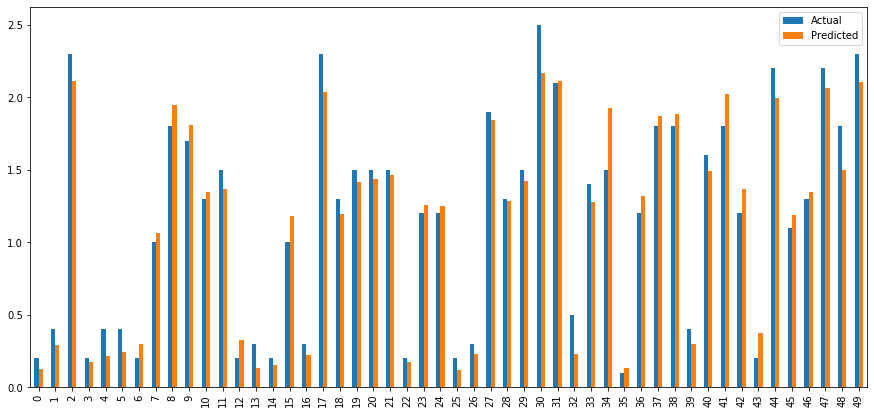

In [90]:
df = pd.DataFrame({'Actual': np.array(test_y), 'Predicted': predicted_y})
df.plot(figsize=(15,7), kind='bar')
plt.show()

In [91]:
from sklearn import metrics
meanAbsError = metrics.mean_absolute_error(np.array(test_y), predicted_y)
meanSqrdError = metrics.mean_squared_error(np.array(test_y), predicted_y)
rootMeanSqrdError = np.sqrt(meanSqrdError)

print(meanAbsError)
print(meanSqrdError)
print(rootMeanSqrdError)

0.12307694608935212
0.02251663457973265
0.15005543835440505
